<a href="https://colab.research.google.com/github/miladasgari178/Noisy-Channel-Classification/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and load data


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn import preprocessing
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import local_binary_pattern

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
## Preprocess
# Convert labels to numerical values
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


# PCA
The given plot illustrates the relationship between the principal component number and the proportion of variance explained. It serves as a useful tool to determine the appropriate number of principal components to retain for dimensionality reduction. By examining the scree plot, we can identify a point where there is a noticeable change in the proportion of variance explained, resembling the shape of an elbow. This point indicates a heuristic or rule of thumb for selecting the number of principal components to retain in order to effectively reduce the dimensionality of the data.

In [ ]:
# Reshape the image data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca.fit(X_train)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)


(50000, 3072)
(50000, 221)


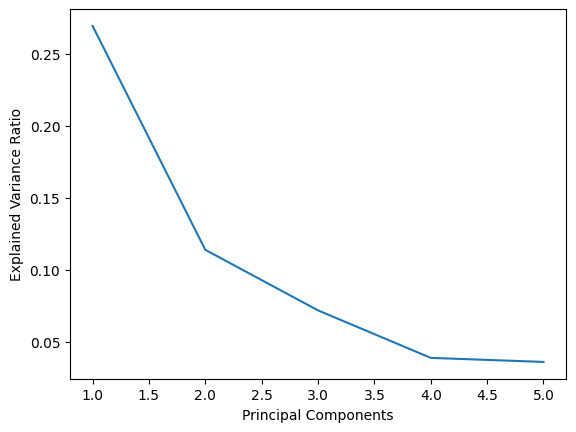

In [ ]:
x = [1,2,3,4,5]
y = pca.explained_variance_ratio_[:5]
plt.plot(x,y)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:
E= pca.components_[:10]
E.shape

(10, 3072)

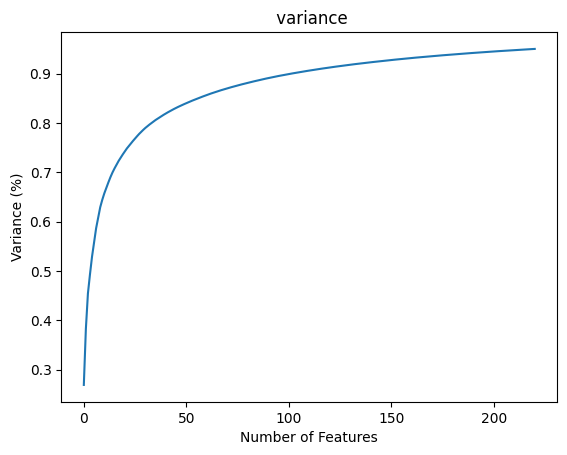

In [ ]:
# Plot the cumulative sum of eigenvalues
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title(' variance')
plt.show()

# Decision tree classification system applied on extracted features using PCA


In [ ]:
max_depth = 9


# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=max_depth)

# Train the classifier on the training data
clf.fit(X_train, y_train)





DecisionTreeClassifier(max_depth=9)

In [ ]:
print(clf.feature_importances_)

[9.72079756e-02 1.19891912e-01 1.06857433e-01 4.77634788e-03
 1.48294864e-01 3.28877603e-02 4.98018377e-02 3.39102104e-02
 1.87763507e-02 0.00000000e+00 1.41229162e-02 6.64543379e-03
 3.16840306e-03 5.87851969e-03 1.59321609e-03 6.43502305e-03
 5.37987061e-02 7.37794727e-03 3.11994759e-04 4.39685739e-02
 1.86762006e-03 9.84055330e-04 1.76575431e-03 2.97563893e-03
 5.07021057e-02 3.73003619e-03 4.62388806e-04 2.94621182e-03
 1.06086036e-03 4.10812647e-04 1.05211566e-03 0.00000000e+00
 1.89712898e-03 0.00000000e+00 1.07960858e-03 2.40681671e-04
 1.16157969e-03 2.29220639e-04 8.14519490e-04 0.00000000e+00
 5.98267690e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.85877630e-03 0.00000000e+00 4.34564128e-04
 5.49415929e-04 4.66081966e-04 1.39315575e-03 0.00000000e+00
 2.46214847e-02 5.99792883e-03 6.17468650e-04 0.00000000e+00
 1.21788091e-03 0.00000000e+00 1.84358270e-03 1.39228523e-02
 1.23607249e-03 1.87940290e-03 0.00000000e+00 0.00000000e+00
 8.35118889e-04 0.000000

[Text(0.49660751565762007, 0.95, 'x[1] <= -9.903\ngini = 0.9\nsamples = 50000\nvalue = [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000\n5000]'),
 Text(0.24101317849686849, 0.85, 'x[2] <= 0.815\ngini = 0.864\nsamples = 14387\nvalue = [1479, 2197, 787, 817, 721, 635, 730, 1192, 2736\n3093]'),
 Text(0.12102035490605428, 0.75, 'x[7] <= 4.417\ngini = 0.862\nsamples = 7535\nvalue = [538, 1069, 489, 557, 469, 341, 480, 865, 730, 1997]'),
 Text(0.06295668058455114, 0.65, 'x[0] <= -7.843\ngini = 0.882\nsamples = 5331\nvalue = [460, 620, 415, 402, 403, 257, 390, 655, 616, 1113]'),
 Text(0.029879958246346556, 0.55, 'x[1] <= -20.002\ngini = 0.889\nsamples = 2004\nvalue = [110, 288, 231, 234, 212, 128, 270, 179, 95, 257]'),
 Text(0.013830897703549061, 0.45, 'x[52] <= -0.909\ngini = 0.87\nsamples = 716\nvalue = [43, 153, 49, 90, 38, 43, 45, 65, 53, 137]'),
 Text(0.006784968684759917, 0.35, 'x[67] <= -1.578\ngini = 0.814\nsamples = 236\nvalue = [12, 85, 16, 29, 14, 10, 16, 7, 14, 33]'),
 Text(0

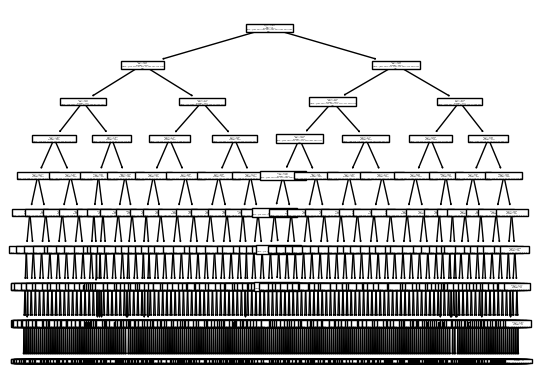

In [ ]:
tree.plot_tree(clf)

In [ ]:
tree = clf.tree_
# Count the nodes and branches
num_internal_nodes = tree.node_count - clf.tree_.n_leaves
num_leaf_nodes = clf.tree_.n_leaves
num_branches = 2 * num_internal_nodes  # Assuming binary splits

# Print the counts
print("Number of internal nodes:", num_internal_nodes)
print("Number of leaf nodes:", num_leaf_nodes)
print("Number of branches:", num_branches)

# Access the root node
root_node = 0  # The root node index is always 0

# Print the root node
print("Root node:", root_node)

Number of internal nodes: 492
Number of leaf nodes: 493
Number of branches: 984
Root node: 0


In [ ]:
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
is_leaves = np.zeros(shape=clf.tree_.node_count, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
#     node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

In [ ]:
num_leaves = 0
for i in range(len(is_leaves)):
    if(is_leaves[i] == True):
        num_leaves +=1
print('Number of leaf nodes',num_leaves)

Number of leaf nodes 493


In [ ]:
# Make predictions on the test data
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_pred_train, y_train)
print("Accuracy:", accuracy_test)
print("Accuracy:", accuracy_train)

Accuracy: 0.3162
Accuracy: 0.3664


In [ ]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1)

F1 Score: 0.31364130665959467


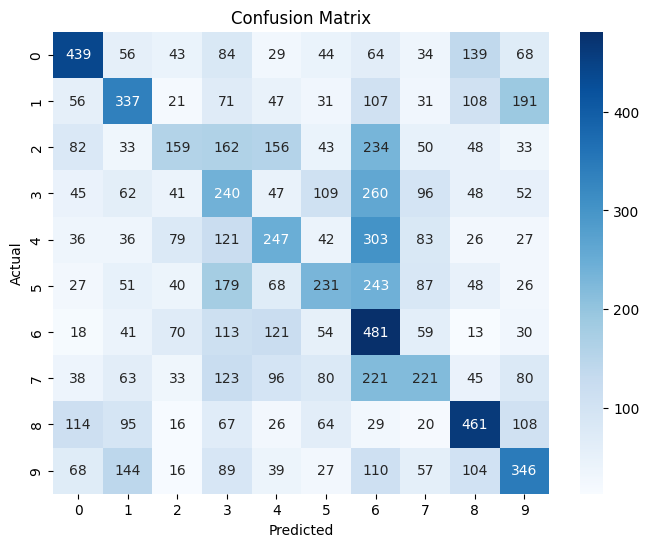

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
print(clf.tree_.node_count)
print(clf.tree_.max_depth)

985
9


# Grid Search

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Define the parameter grid for hyperparameter tuning
param_grid = {
'max_depth': [3, 8, 10],
'min_samples_split': [20, 30, 40],
'min_samples_leaf': [20, 25, 30]
}
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit (X_train, y_train)
# Print the best hyperparameters and corresponding mean cross-validated score
print ("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10}
Best Score: 0.30632000000000004


# Auto Encoder


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torch.autograd import Variable

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available. Using GPU for training.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU for training.")

# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(256, 3, kernel_size=3, padding=1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Hyperparameters
learning_rate = 0.001
batch_size = 32
num_epochs = 15

# Load CIFAR-10 dataset
train_dataset = CIFAR10(root='./data', train=True, transform=ToTensor(), download=True)
test_dataset = CIFAR10(root='./data', train=False, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create the Autoencoder model
autoencoder = Autoencoder().to(device)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    train_loss = 0.0

    for images, _ in train_loader:
        images = images.to(device)
        reconstructions = autoencoder(images)


        # Compute loss
        loss = criterion(reconstructions, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

    # Calculate average loss
    train_loss /= len(train_loader.dataset)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}")

import os

save_dir = 'save'
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, 'cnn_autoencoder.pth')

# Save the trained model
torch.save(autoencoder.state_dict(), save_path)

# Load the trained model
autoencoder = Autoencoder().to(device)
autoencoder.load_state_dict(torch.load('save/cnn_autoencoder.pth'))


# Get encoder features
encoder = autoencoder.encoder
encoder_features_train = []
labels_train = []  # Store the labels

for images, labels in train_loader:
    images = images.to(device)  # Move images to the GPU device
    features = encoder(images)
    encoder_features_train.append(features.detach())
    labels_train.extend(labels)  # Save the labels

encoder_features_train = torch.cat(encoder_features_train, dim=0)

# Reshape encoder features
encoder_features_train = encoder_features_train.view(encoder_features_train.size(0), -1)

# Convert labels_train to a NumPy array
labels_train = np.array(labels_train)




CUDA is available. Using GPU for training.


100%|██████████| 170498071/170498071 [00:01<00:00, 104985197.56it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch [1/15], Loss: 0.0140
Epoch [2/15], Loss: 0.0077
Epoch [3/15], Loss: 0.0064
Epoch [4/15], Loss: 0.0057
Epoch [5/15], Loss: 0.0053
Epoch [6/15], Loss: 0.0050
Epoch [7/15], Loss: 0.0048
Epoch [8/15], Loss: 0.0046
Epoch [9/15], Loss: 0.0045
Epoch [10/15], Loss: 0.0044
Epoch [11/15], Loss: 0.0043
Epoch [12/15], Loss: 0.0042
Epoch [13/15], Loss: 0.0041
Epoch [14/15], Loss: 0.0041
Epoch [15/15], Loss: 0.0040


In [ ]:
encoder_features_train = encoder_features_train.to('cpu').numpy()


In [ ]:
# Get encoder features
encoder = autoencoder.encoder
encoder_features_test = []
labels_test = []  # Store the labels

for images, labels in test_loader:
    images = images.to(device)  # Move images to the GPU device
    features = encoder(images)
    encoder_features_test.append(features.detach())
    labels_test.extend(labels)  # Save the labels

encoder_features_test = torch.cat(encoder_features_test, dim=0)

# Reshape encoder features
encoder_features_test_flat = encoder_features_test.view(encoder_features_test.size(0), -1).to('cpu').numpy()

# Convert labels_train to a NumPy array
labels_test= np.array(labels_test)



In [ ]:
print(encoder_features_train.shape)

(50000, 1024)


# Decision tree classification system applied on extracted features using Auto Encoder


In [ ]:
import numpy as np

# Move the encoder features and labels to CPU and convert to NumPy arrays
# encoder_features_train_np = np.concatenate([tensor.cpu().numpy() for tensor in encoder_features_train], axis=0)


# Create the decision tree classifier
classifier = DecisionTreeClassifier(max_depth = 9)

predicted_labels = []
# Train the classifier
classifier.fit(encoder_features_train, labels_train)
predicted_labels = classifier.predict(encoder_features_test_flat)

# Calculate accuracy
accuracy_test = accuracy_score(labels_test, predicted_labels)

print("Accuracy:", accuracy_test)

Accuracy: 0.3543


In [ ]:
from sklearn.metrics import f1_score
# Calculate F1 score

f1 = f1_score(labels_test, predicted_labels, average='weighted')

print("F1 Score:", f1)

F1 Score: 0.3480695655570465


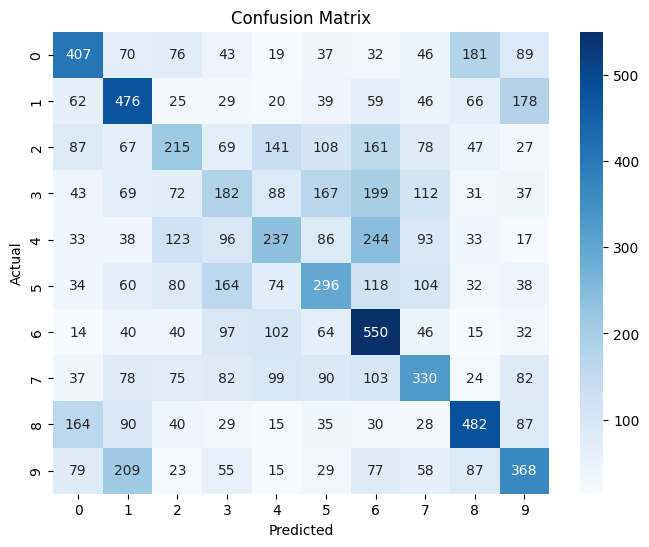

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(labels_test, predicted_labels)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Define the parameter grid for hyperparameter tuning
param_grid = {
'max_depth': [3, 8, 10],
# 'min_samples_split': [20, 30, 40],
# 'min_samples_leaf': [20, 25, 30]
}
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit (encoder_features_train, labels_train)
# Print the best hyperparameters and corresponding mean cross-validated score
print ("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



Best Hyperparameters: {'max_depth': 10}
Best Score: 0.33964
